# In this Notebook
- we use different nlp-techniques to transform the text description (text) of a pet into a feature that is accessible to a machine learning model
- use accuracy in predicting our target to pick the best method
- train a logistic regression model on train data including the processed nlp-feature

#### Load libraries and data

In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# to import custom functions
import sys
import os

# Get the parent directory
parent_dir = os.path.dirname(os.getcwd()) 
# Add the parent directory to sys.path
sys.path.append(parent_dir)
# import our custom metrics function and our custom scorer (Cohen's Kappa)

from custom_functions import our_metrics
from custom_functions import get_kappa

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/annastein/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/annastein/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# read in data
df_raw = pd.read_csv('../data/petfinder-adoption-prediction/train/pet_nlp.csv', encoding="utf-8")

In [3]:
# drop rows with multiple listings
df_raw = df_raw[df_raw["Quantity"]==1]

In [4]:
# extract description text column and target
df_description = df_raw[['Description', 'AdoptionSpeed']]

In [5]:
# define feature and target
y = df_description.AdoptionSpeed
X = df_description.Description

In [6]:
# find missing values
X.isnull().sum()

9

In [7]:
# fill missing values
X = X.fillna('no description')

In [8]:
# train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#### CountVectorizer

In [9]:
# Fit the CountVectorizer to the training data
count_vect = CountVectorizer().fit(X_train)

# transform X_train to a document-term matrix
X_train_c_vectorized = count_vect.transform(X_train)
print("X_train_vectorized: ", X_train_c_vectorized)

X_train_vectorized:    (0, 558)	1
  (0, 794)	3
  (0, 1439)	1
  (0, 1705)	1
  (0, 2174)	2
  (0, 2475)	1
  (0, 3333)	1
  (0, 3894)	1
  (0, 3897)	1
  (0, 4177)	1
  (0, 4200)	1
  (0, 4670)	1
  (0, 4698)	1
  (0, 4967)	2
  (0, 4981)	1
  (0, 5551)	1
  (0, 5760)	3
  (0, 5917)	2
  (0, 5971)	1
  (0, 6110)	1
  (0, 6187)	1
  (0, 6505)	2
  (0, 7479)	1
  (0, 7734)	1
  (0, 7790)	2
  :	:
  (8672, 5651)	1
  (8672, 5743)	1
  (8672, 5782)	1
  (8672, 5859)	1
  (8672, 7137)	1
  (8672, 7388)	1
  (8672, 7591)	1
  (8672, 8130)	1
  (8672, 8655)	1
  (8672, 8820)	2
  (8672, 9283)	1
  (8672, 10255)	1
  (8672, 10942)	1
  (8672, 11526)	1
  (8672, 11839)	1
  (8672, 12328)	1
  (8672, 12343)	1
  (8672, 13063)	1
  (8672, 13392)	1
  (8672, 13559)	7
  (8672, 13615)	1
  (8672, 14234)	1
  (8672, 14468)	1
  (8672, 14642)	1
  (8672, 14726)	1


In [10]:
X_train_c_vectorized.shape

(8673, 15958)

In [11]:
print("X_train shape = {}".format(X_train.shape))
print("Vocabulary length = {}".format(len(count_vect.vocabulary_)))

X_train shape = (8673,)
Vocabulary length = 15958


In [12]:
# vocabulary list (sorted alphabetically)
sorted(count_vect.vocabulary_.items(), key=lambda x: x[1])[:20]

[('00', 0),
 ('00pm', 1),
 ('01', 2),
 ('02', 3),
 ('03', 4),
 ('04', 5),
 ('05', 6),
 ('05kg', 7),
 ('06', 8),
 ('08', 9),
 ('09', 10),
 ('0ct', 11),
 ('10', 12),
 ('10am', 13),
 ('10cm', 14),
 ('10days', 15),
 ('10in1', 16),
 ('10inch', 17),
 ('10kg', 18),
 ('10kgs', 19)]

In [13]:
# Train the model
model = LogisticRegression(max_iter=1500)
model.fit(X_train_c_vectorized, y_train)

# Predict
predictions = model.predict(count_vect.transform(X_test))
predict_probab = model.predict_proba(count_vect.transform(X_test))[:,1]

count_vect_acc_score = accuracy_score(y_test, predictions).round(4)
print(f'CountVectorizer Accuracy Score {count_vect_acc_score}')


CountVectorizer Accuracy Score 0.3676



#### TF-IDF

In [14]:
# Fit the TfidfVectorizer to the training data, minimum document frequency of 15
vect_tfidf = TfidfVectorizer(min_df=15).fit(X_train)

# transform the documents in the training data to a document-term matrix
X_train_vectorized_tfidf = vect_tfidf.transform(X_train)

# let's look of some of the words gathered with this method
sorted(vect_tfidf.vocabulary_.items(), key=lambda x: x[1])[:20]

[('10', 0),
 ('10am', 1),
 ('11', 2),
 ('12', 3),
 ('13', 4),
 ('14', 5),
 ('15', 6),
 ('16', 7),
 ('17', 8),
 ('18', 9),
 ('19', 10),
 ('1st', 11),
 ('20', 12),
 ('21', 13),
 ('23', 14),
 ('24', 15),
 ('25', 16),
 ('26', 17),
 ('27', 18),
 ('28', 19)]

In [15]:
X_train_vectorized_tfidf.shape

(8673, 2262)

In [16]:
# Train the model
model = LogisticRegression(max_iter=1500)
model.fit(X_train_vectorized_tfidf, y_train)

# Predict the transformed test documents
predictions_tfidf = model.predict(vect_tfidf.transform(X_test))

acc_score_tfidf = accuracy_score(y_test, predictions_tfidf).round(4)
print(f'TFIDF-Vectorizer Accuracy Score {acc_score_tfidf}')

TFIDF-Vectorizer Accuracy Score 0.3596


#### Stemming

In [17]:
# Initializing stemmer and countvectorizer 
stemmer = nltk.PorterStemmer()
cv_analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in cv_analyzer(doc))

# define CountVectorizer with stemming function 
stem_vectorizer = CountVectorizer(analyzer = stemmed_words)

# Transform X_train
X_train_stem_vectorized = stem_vectorizer.fit_transform(X_train)

In [18]:
X_train

8700     Smoky was rescued after a man left him by the ...
14502    Name Spotty....DOB 1 Sep . She is a bit skinny...
1880     Xiao guai has 7 siblings in total. Their mum w...
3170                        DOB: 25 May Area: Kuala Lumpur
4261     Little Carol is a happy girl. Very energetic a...
                               ...                        
9035     Hop Nop is a stray rescue from the street. He ...
13864    Tom is a very lovely & intelligent good boy. H...
4337                                                    xx
12360    Mix breed Male Puppy open for adoption. Place:...
11827    I rescued Dibo few months ago and took her to ...
Name: Description, Length: 8673, dtype: object

In [19]:
# Train the model with stemmed and vectorized dataset
model_stemm = LogisticRegression(max_iter=1500)
model_stemm.fit(X_train_stem_vectorized, y_train)

# Predict
predictions_stem = model_stemm.predict(stem_vectorizer.transform(X_test))

acc_score_stem = accuracy_score(y_test, predictions_stem).round(4)
print(f'Stem_Count Accuracy Score {acc_score_stem}')

Stem_Count Accuracy Score 0.3627


In [20]:
# get the feature names as numpy array
feature_names = np.array(stem_vectorizer.get_feature_names_out())

# Sort the coefficients from the model
sorted_coef_index = model_stemm.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
print("Smallest Coefs:\n{}\n".format(feature_names[sorted_coef_index[:10]]))
print("Largest Coefs: \n{}".format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['shelter' 'abl' 'locat' 'thank' 'recov' 'person' 'stranger' 'litter'
 'feel' 'seem']

Largest Coefs: 
['chanel' 'dsh' 'healti' 'neyo' 'jojo' 'natasha' 'cool' 'xiao' 'pepsi'
 'cougar']


#### Lemmatization

In [21]:
# Initialization of Lemmatizer
WNlemma = nltk.WordNetLemmatizer()
cv_analyzer = CountVectorizer().build_analyzer()

def lemmatize_word(doc):
    return (WNlemma.lemmatize(t) for t in cv_analyzer(doc))

lemm_vectorizer = CountVectorizer(analyzer = lemmatize_word)

# Transform X_train
X_train_lemm_vectorized = lemm_vectorizer.fit_transform(X_train)

In [22]:
X_train_lemm_vectorized.shape

(8673, 14943)

In [23]:
# Train the model with stemmed and vectorized dataset
model_lemm = LogisticRegression(max_iter=1500)
model_lemm.fit(X_train_lemm_vectorized, y_train)

# Predict
predict_probab = model_lemm.predict_proba(lemm_vectorizer.transform(X_test))[:,1]
predictions_lemm = model_lemm.predict(lemm_vectorizer.transform(X_test))

acc_score_lemm = accuracy_score(y_test, predictions_lemm).round(4)
print(f'Lemm_Count Accuracy Score {acc_score_lemm}')

Lemm_Count Accuracy Score 0.3655


#### Which method had highest accuracy?

In [24]:
print(f'Count_Vect Accuracy Score {count_vect_acc_score}')
print(f'TFIDF Accuracy Score {acc_score_tfidf}')
print(f'Stem_Count Accuracy Score {acc_score_stem}')
print(f'Lemm_Count Accuracy Score {acc_score_lemm}')

Count_Vect Accuracy Score 0.3676
TFIDF Accuracy Score 0.3596
Stem_Count Accuracy Score 0.3627
Lemm_Count Accuracy Score 0.3655


processing the description text with the count vectorizer returned the highest accuracy of a logistic regression model, 
so we will train the model using the transformed text and the other features next.

#### Log-Reg Model with processed description feature

In [25]:
# vectorized description text as sparse matrix
X_train_c_vectorized

<8673x15958 sparse matrix of type '<class 'numpy.int64'>'
	with 380770 stored elements in Compressed Sparse Row format>

In [26]:
# convert sparse matrix to df
df_nlp_train = pd.DataFrame.sparse.from_spmatrix(X_train_c_vectorized)
df_nlp_test = pd.DataFrame.sparse.from_spmatrix(count_vect.transform(X_test))

In [27]:
# export as pkl if used in other models
# pd.DataFrame.sparse.from_spmatrix(X_train_c_vectorized).to_pickle('../data/petfinder-adoption-prediction/train/df_nlp_train.pkl')
# pd.DataFrame.sparse.from_spmatrix(count_vect.transform(X_test)).to_pickle('../data/petfinder-adoption-prediction/train/df_nlp_test.pkl')

In [28]:
# reading in the original features (for distance based models with dropped first column during dummy creation in order to avoid colinearity)
X_test = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_dropped_first.csv', delimiter=',')
X_train = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_dropped_first.csv', delimiter=',')
y_test = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv', delimiter=',')
y_train = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv', delimiter=',')

In [29]:
# change format of y from dataframe to array
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

In [30]:
# concatenate processed description text with other features
X_train_nlp = pd.concat([X_train, df_nlp_train], axis=1)
X_test_nlp = pd.concat([X_test, df_nlp_test], axis=1)

In [31]:
# convert all column headers to string
X_train_nlp.columns = X_train_nlp.columns.astype(str)
X_test_nlp.columns = X_test_nlp.columns.astype(str)

In [32]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1500)
log_reg.fit(X_train_nlp, y_train)

y_pred_train_nlp = log_reg.predict(X_train_nlp)
y_pred_test_nlp = log_reg.predict(X_test_nlp)

/Users/annastein/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/annastein/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/Users/annastein/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.8517
_____________________
Weighted Quadratic Kappa: 0.8149


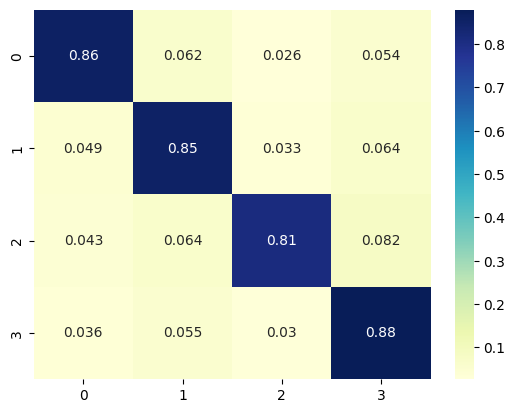

In [35]:
# Model metrics on train-data
our_metrics(y_train, y_pred_train_nlp, normalize=True)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3046
_____________________
Weighted Quadratic Kappa: 0.1289


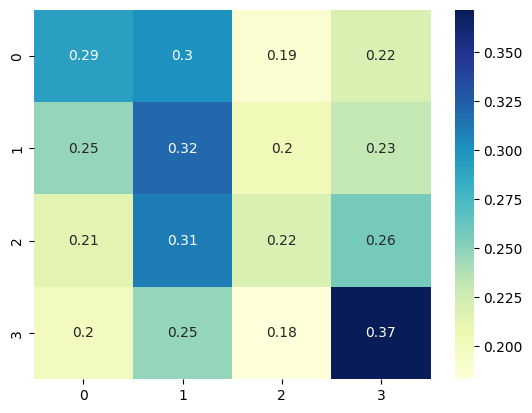

In [36]:
# Model metrics on test-data
our_metrics(y_test, y_pred_test_nlp, normalize=True)

#### Conclusion

The default logistic regression model overfit on the test set and returned a lower Accuracy and Kappa-Scores than our best using the character
count of the text as a feature.
We will conclude processing the pets' description text here, but the description sentiment should be 
further processed in future work to improve the model.